Aim is to build a machine learning model on the Titanic dataset to predict whether a passenger on the Titanic would have been survived or not using the passenger data.

We start by importing important libraries.

In [266]:
#for data analysis and data wrangling 
import numpy as np
import pandas as pd
#for data visualization
import seaborn as sns
import matplotlib.pyplot as plt

We start by acquiring the training and testing datasets into Pandas DataFrames.

In [267]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

Which features are available in the dataset?
Noting the feature names for directly manipulating or analyzing these.

In [268]:
print('train features =', train_df.columns.values)
print('test features =', test_features)

('train features =', array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object))
('test features =', array(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object))


preview data using head or tail function

In [269]:
train_df.head()
#train_df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [270]:
train_df.info()
#test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


Categorical: Survived, Sex, and Embarked. Ordinal: Pclass.

Continous: Age, Fare. Discrete: SibSp, Parch.

In [271]:
train_df.describe(include= 'all')
#test_df.describe()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Graham, Mr. George Edward",male,NaN,NaN,NaN,CA. 2343,NaN,C23 C25 C27,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [272]:
Age_mode=train_df['Age'].mode()
Age_mode_test=test_df['Age'].mode()
Fare_mean= test_df['Fare'].mean()
Embarked_mode=train_df['Embarked'].mode()
Age_mode, Age_mode_test, Fare_mean, Embarked_mode

(0    24.0
 dtype: float64, 0    21.0
 1    24.0
 dtype: float64, 35.6271884892086, 0    S
 dtype: object)

In [273]:
train_df['Age'] = train_df['Age'].fillna(21)
test_df['Age'] = test_df['Age'].fillna(24)
test_df['Fare'] = test_df['Fare'].fillna(35.63)
train_df['Embarked'] = train_df['Embarked'].fillna('S')


In [274]:
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [276]:
test_df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64

In [277]:
train_df[['Pclass', 'Survived']].groupby(['Pclass']).mean()

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


In [278]:
train_df[["Sex", "Survived"]].groupby(['Sex']).mean()

,Survived
Sex,
female,0.742038
male,0.188908


In [279]:
train_df[["SibSp", "Survived"]].groupby(['SibSp']).mean()

,Survived
SibSp,
0,0.345395
1,0.535885
2,0.464286
3,0.250000
4,0.166667
5,0.000000
8,0.000000


In [280]:
train_df[["Parch", "Survived"]].groupby(['Parch']).mean()

,Survived
Parch,
0,0.343658
1,0.550847
2,0.500000
3,0.600000
4,0.000000
5,0.200000
6,0.000000


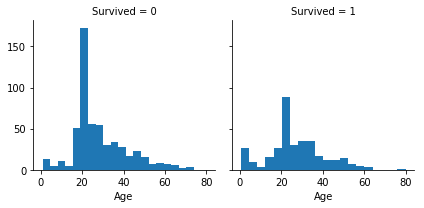

In [281]:
corr = sns.FacetGrid(train_df, col='Survived')
corr.map(plt.hist, 'Age', bins=20)

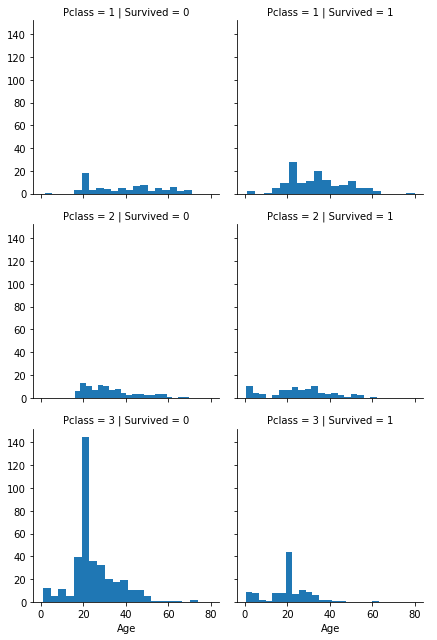

In [282]:
grid = sns.FacetGrid(train_df, col='Survived', row='Pclass')
grid.map(plt.hist, 'Age', bins=20)
grid.add_legend()

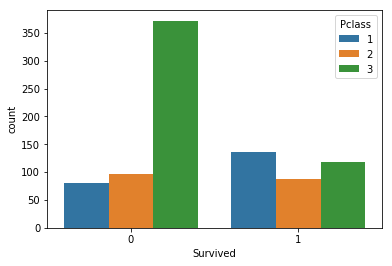

In [283]:
#Visualizing Survivors based on their Passenger Classes
sns.countplot(x='Survived',hue='Pclass',data=train_df)

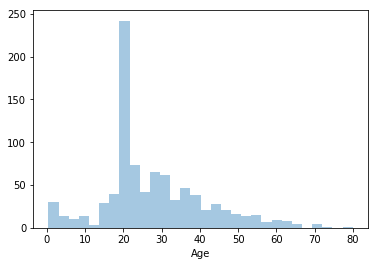

In [284]:
#Plotting on the bases of the Age of the Passengers
sns.distplot(train_df['Age'].dropna(), kde=False, bins=30)

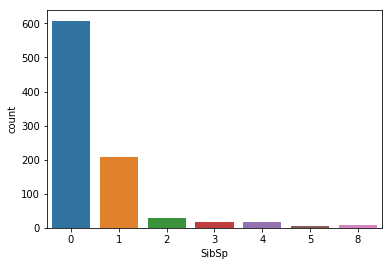

In [285]:
#Counting the number of Passengers who had boarded with their siblings and/or their spouses
sns.countplot(x='SibSp', data=train_df)

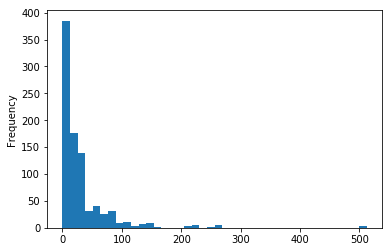

In [286]:
#Plotting Fare against the number of Passengers
train_df['Fare'].plot.hist(bins=40)

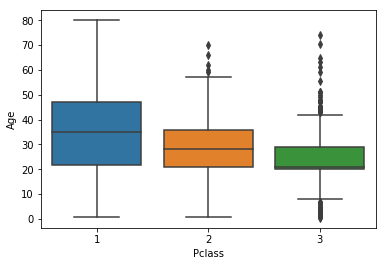

In [287]:
#Getting the Age of the Passengers on the basis of their Class, also the average Age per class
plt.figure()
sns.boxplot(x='Pclass', y='Age', data=train_df)

Observations:
1. Sex Age Pclass has correlation to Survived 
2. SibSp and Parch have zero correlation
3. Cabin has most number of Nan values
4. Ticket has alpha numeric values but has no correlation

Decisions:
1. We should consider Age, Sex, Pclass, Fare,  Embarked as features.
2. Drop PassengerID, Name, Ticket, Cabin for model training.

In [290]:
train = train_df.drop(['Name', 'PassengerId','Ticket','Cabin'], axis=1)
print(train.shape) 


(891, 8)


Converting categorical variables

In [291]:
train["Sex"].replace("male", 1, inplace = True)
train["Sex"].replace("female", 0, inplace = True)
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,S
1,1,1,0,38.0,1,0,71.2833,C
2,1,3,0,26.0,0,0,7.9250,S
3,1,1,0,35.0,1,0,53.1000,S
4,0,3,1,35.0,0,0,8.0500,S


In [292]:
train["Embarked"].replace("S", 1, inplace = True)
train["Embarked"].replace("C", 0, inplace = True)
train["Embarked"].replace("Q", 0, inplace = True)
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,1
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,1
3,1,1,0,35.0,1,0,53.1000,1
4,0,3,1,35.0,0,0,8.0500,1


In [293]:
test = test_df.drop(['Name', 'PassengerId','Ticket','Cabin'], axis=1)
print(test.shape) 



(418, 7)


In [294]:
test["Sex"].replace("male", 1, inplace = True)
test["Sex"].replace("female", 0, inplace = True)
test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,34.5,0,0,7.8292,Q
1,3,0,47.0,1,0,7.0000,S
2,2,1,62.0,0,0,9.6875,Q
3,3,1,27.0,0,0,8.6625,S
4,3,0,22.0,1,1,12.2875,S


In [295]:
test["Embarked"].replace("S", 1, inplace = True)
test["Embarked"].replace("C", 0, inplace = True)
test["Embarked"].replace("Q", 0, inplace = True)
test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,34.5,0,0,7.8292,0
1,3,0,47.0,1,0,7.0000,1
2,2,1,62.0,0,0,9.6875,0
3,3,1,27.0,0,0,8.6625,1
4,3,0,22.0,1,1,12.2875,1


In [300]:
X_train = train.drop("Survived", axis=1)
Y_train = train["Survived"]
X_test  = test
X_train.head(), Y_train.head(), X_test.head()

(   Pclass  Sex   Age  SibSp  Parch     Fare  Embarked
 0       3    1  22.0      1      0   7.2500         1
 1       1    0  38.0      1      0  71.2833         0
 2       3    0  26.0      0      0   7.9250         1
 3       1    0  35.0      1      0  53.1000         1
 4       3    1  35.0      0      0   8.0500         1, 0    0
 1    1
 2    1
 3    1
 4    0
 Name: Survived, dtype: int64,    Pclass  Sex   Age  SibSp  Parch     Fare  Embarked
 0       3    1  34.5      0      0   7.8292         0
 1       3    0  47.0      1      0   7.0000         1
 2       2    1  62.0      0      0   9.6875         0
 3       3    1  27.0      0      0   8.6625         1
 4       3    0  22.0      1      1  12.2875         1)

In [303]:
# Logistic Regression

logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, Y_train) * 100, 2)
acc_log

79.91

In [317]:
coeff_df = pd.DataFrame(train.columns.delete(0))
coeff_df.columns = ['Feature']
coeff_df["Correlation"] = pd.Series(logreg.coef_[0])

coeff_df.sort_values

<bound method DataFrame.sort_values of     Feature  Correlation
0    Pclass    -0.834533
1       Sex    -2.487874
2       Age    -0.025036
3     SibSp    -0.287422
4     Parch    -0.063119
5      Fare     0.004555
6  Embarked    -0.220921>

Fare is highest positivie coefficient, implying as the Fare value increases the probability of Survived increases the most.
Inversely as sex (Male=1, Female=0) increases, probability of Survived decreases the most.
This way Pclass is a good feature to model as it has second highest negative correlation with Survived.
Same way Age also has negative correlation with survived which implies as age increases chance of survival decreses.  

In [318]:
# Support Vector Machines

svc = SVC()
svc.fit(X_train, Y_train)
Y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_train, Y_train) * 100, 2)
acc_svc

90.24

In [306]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)
acc_knn

83.95

In [307]:
# Gaussian Naive Bayes

gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
Y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)
acc_gaussian

78.79

In [310]:
# Perceptron# Stochastic Gradient Descent

sgd = SGDClassifier()
sgd.fit(X_train, Y_train)
Y_pred = sgd.predict(X_test)
acc_sgd = round(sgd.score(X_train, Y_train) * 100, 2)
acc_sgd

perceptron = Perceptron()
perceptron.fit(X_train, Y_train)
Y_pred = perceptron.predict(X_test)
acc_perceptron = round(perceptron.score(X_train, Y_train) * 100, 2)
acc_perceptron

/Users/dinakar/anaconda2/lib/python2.7/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


67.0

In [309]:
# Linear SVC

linear_svc = LinearSVC()
linear_svc.fit(X_train, Y_train)
Y_pred = linear_svc.predict(X_test)
acc_linear_svc = round(linear_svc.score(X_train, Y_train) * 100, 2)
acc_linear_svc

74.97

In [311]:
# Stochastic Gradient Descent

sgd = SGDClassifier()
sgd.fit(X_train, Y_train)
Y_pred = sgd.predict(X_test)
acc_sgd = round(sgd.score(X_train, Y_train) * 100, 2)
acc_sgd

71.6

In [312]:
# Decision Tree

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
acc_decision_tree

98.09

In [313]:
# Random Forest

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
acc_random_forest

98.09

Which Model fits the best.

In [314]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree'],
    'Score': [acc_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, acc_perceptron, 
              acc_sgd, acc_linear_svc, acc_decision_tree]})
models.sort_values(by='Score', ascending=False)

,Model,Score
3,Random Forest,98.09
8,Decision Tree,98.09
0,Support Vector Machines,90.24
1,KNN,83.95
2,Logistic Regression,79.91
4,Naive Bayes,78.79
7,Linear SVC,74.97
6,Stochastic Gradient Decent,71.60
5,Perceptron,67.00


final_submission = pd.DataFrame({
        "PassengerId": test_df["PassengerId"],
        "Survived": Y_pred
    }) use Y_pred from highest score model

final_submission.to_csv('submission.csv', index=False)